In this tutorial, we're going to take previously saved results from ttvnest and reproduce the important plots. First, we import necessary things:

In [1]:
%matplotlib inline
import ttvnest

Then we download the data that these results are valid for:

In [2]:
nplanets = 2
filename = 'k2_24.dat'
data, errs = ttvnest.load_data.get_data_from_file(nplanets, filename)

Reading data from file...
Data retrieved!


Then we load the results:

In [3]:
results = ttvnest.io_utils.load_results('results_k2_24.p')

Next, let's print a summary of the results:

In [4]:
ttvnest.retrieval.posterior_summary(results)

Summary: 
$M_1/M_\star$: $35.91758278079711^{+2.911222832071381}_{-3.503445213184243}$
$P_1\ [\mathrm{days}]$: $20.883046174369813^{+0.0007248620234499015}_{-0.000849568837594461}$
$e_1\cos(\omega_1)$: $-0.09565454447137561^{+0.005396153783437468}_{-0.0035004080904753043}$
$e_1\sin(\omega_1)$: $0.021356107061961473^{+0.008366543656054107}_{-0.010521728079238468}$
$\mathcal{M}_1\ [^\circ]$: $193.4829032801932^{+4.790585992750778}_{-5.966043260636496}$
$M_2/M_\star$: $34.27337448484748^{+3.8565070421693477}_{-4.4151572121617555}$
$P_2\ [\mathrm{days}]$: $42.37018463515216^{+0.0022277787667519533}_{-0.0020379026559709246}$
$e_2\cos(\omega_2)$: $0.09273300919643196^{+0.004114614233407463}_{-0.0039016961801479344}$
$e_2\sin(\omega_2)$: $-0.04439222655435476^{+0.005743675837542032}_{-0.008133117942046464}$
$\mathcal{M}_2\ [^\circ]$: $331.9332475860446^{+4.537169325586433}_{-3.7113973949485057}$


Looks good. Now let's make all of the dynesty plots (corner plot, run plot, trace plot)

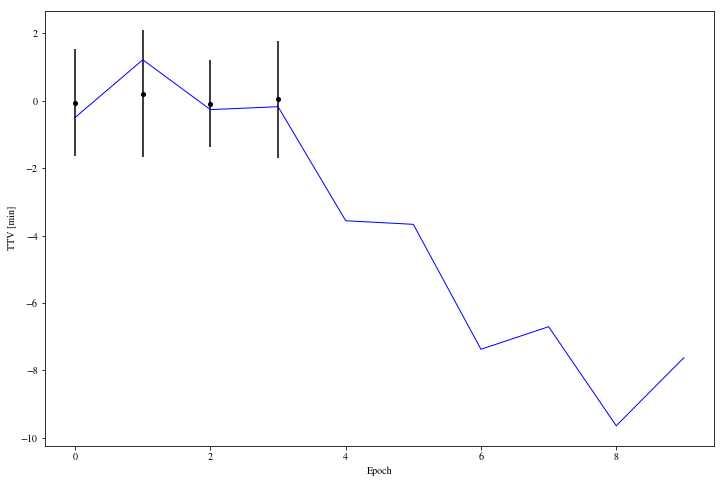

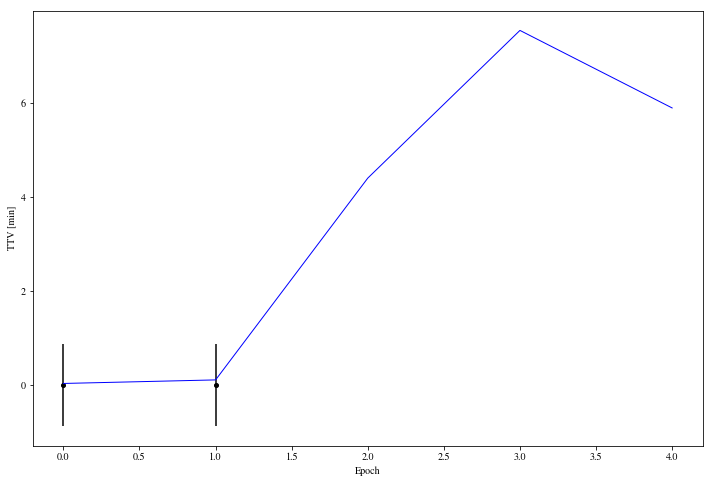

<Figure size 1440x1440 with 0 Axes>

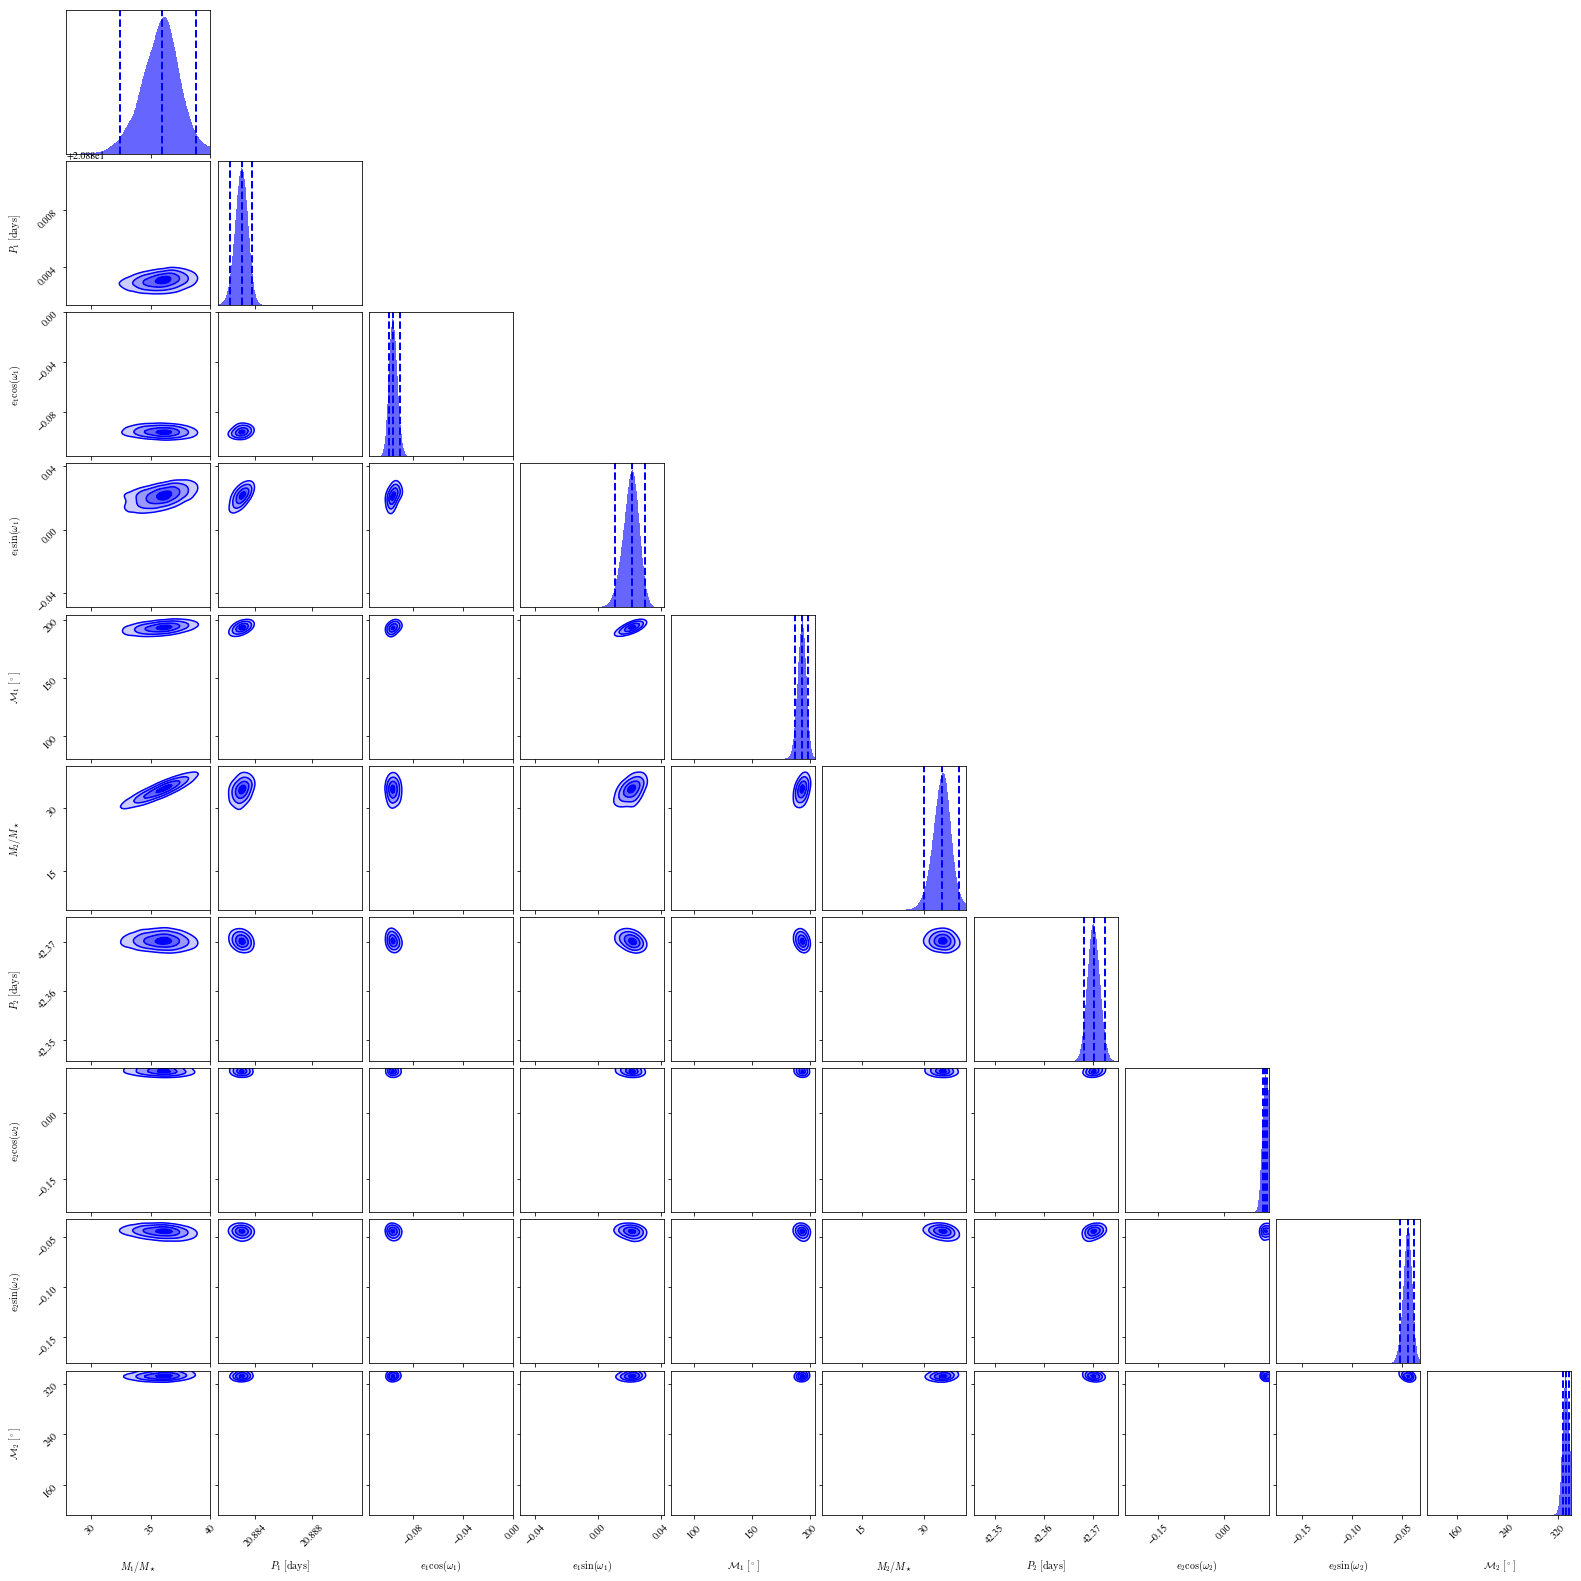

<Figure size 1440x1440 with 0 Axes>

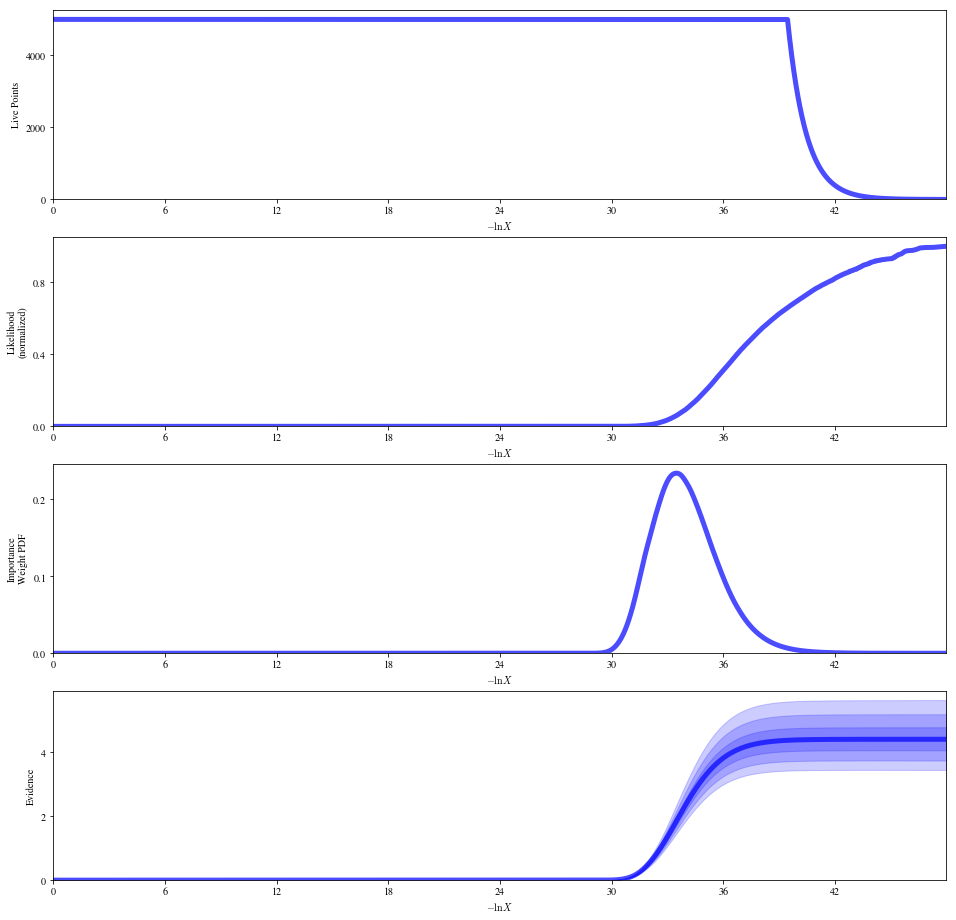

<Figure size 1440x1440 with 0 Axes>

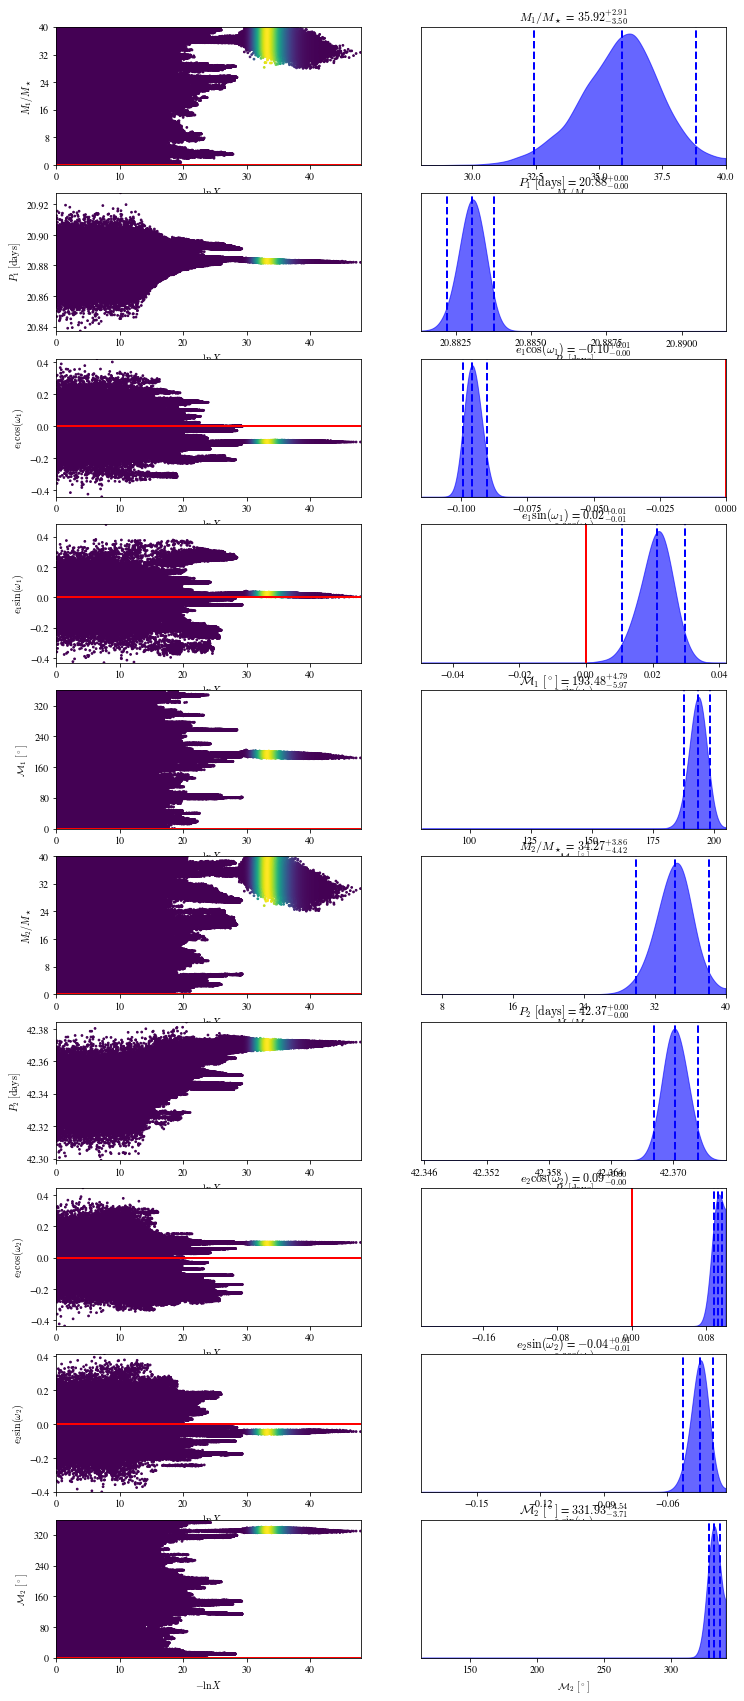

In [5]:
ttvnest.plot_utils.plot_results(results, data, errs, start_time = 2454900 + 2000, sim_length = 200)
ttvnest.plot_utils.dynesty_plots(results, nplanets)

Finally, let's go a step beyond what we did before and see how the model and uncertainties propogate forward after a decade:

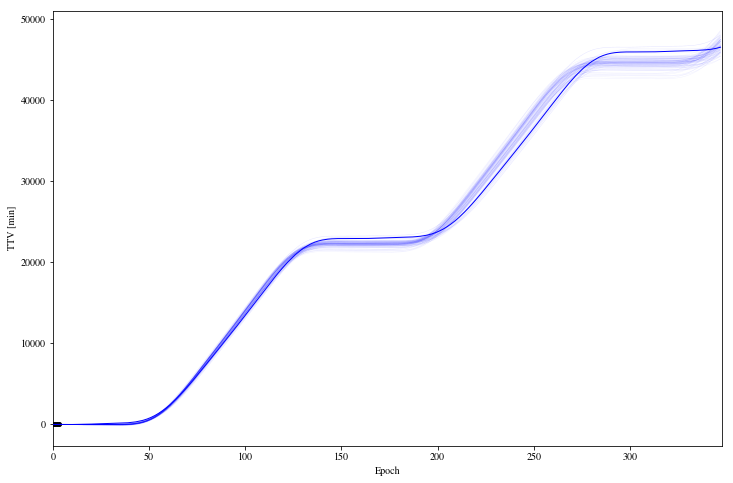

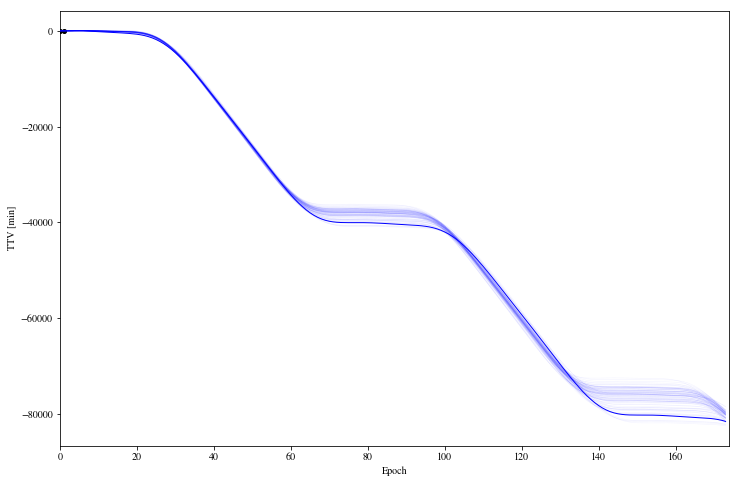

In [6]:
ttvnest.plot_utils.plot_results(results, data, errs, start_time = 2454900 + 2000, uncertainty_curves = 100, 
                                sim_length = 3652.5*2)

In [7]:
measurement_uncertainty = 10./24./60.
measured_planet = 0
information_timeseries = ttvnest.followup.calculate_information_timeseries(results, measurement_uncertainty, 
                                                                           measured_planet, start_time = 2454900 + 2000,
                                                                           sim_length = 1000)

Propogating all models in posterior forward to time 1000...
1% complete
2% complete
3% complete
4% complete
5% complete
6% complete
7% complete
8% complete
9% complete
10% complete
11% complete
12% complete
13% complete
14% complete
15% complete
16% complete
17% complete
18% complete
19% complete
20% complete
21% complete
22% complete
23% complete
24% complete
25% complete
26% complete
27% complete
28% complete
29% complete
30% complete
31% complete
32% complete
33% complete
34% complete
35% complete
36% complete
37% complete
38% complete
39% complete
40% complete
41% complete
42% complete
43% complete
44% complete
45% complete
46% complete
47% complete
48% complete
49% complete
50% complete
51% complete
52% complete
53% complete
54% complete
55% complete
56% complete
57% complete
58% complete
59% complete
60% complete
61% complete
62% complete
63% complete
64% complete
65% complete
66% complete
67% complete
68% complete
69% complete
70% complete
71% complete
72% complete
73% complete


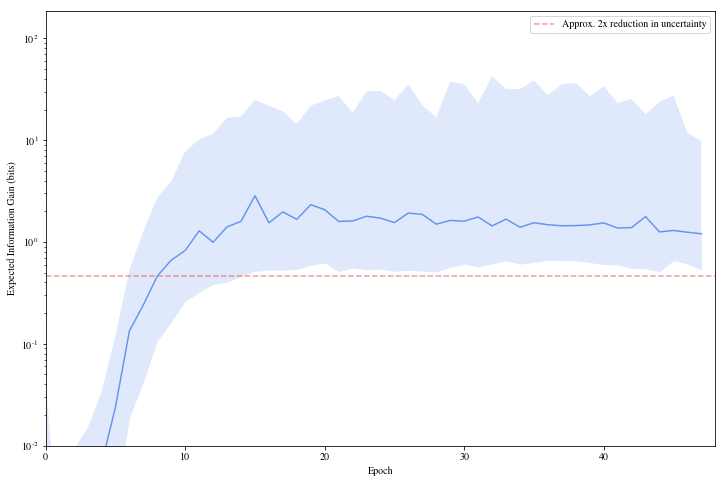

In [8]:
ttvnest.plot_utils.plot_information_timeseries(information_timeseries)